# Time-Based Cohort Analysis for E-Shop Pro.

### _Import libraries and Packages_

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### _Load in dataset_

In [2]:
url = 'C:/Codes/Projects/Python-Projects/datasets/Dataset_ecommerce.csv'
data = pd.read_csv(url)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   InvoiceDate  541909 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    541909 non-null  object 
 4   Description  541909 non-null  object 
 5   Quantity     541909 non-null  int64  
 6   UnitPrice    541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# drop rows with no Customer Id

data = data.dropna(subset=['CustomerID'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
data.describe()

,CustomerID,Quantity,UnitPrice
count,406829.000000,406829.000000,406829.000000
mean,15287.690570,50.478471,50.477654
std,1713.600303,28.872921,28.573075
min,12346.000000,1.000000,1.000000
25%,13953.000000,25.000000,25.710000
50%,15152.000000,50.000000,50.430000
75%,16791.000000,75.000000,75.170000
max,18287.000000,100.000000,100.000000


In [6]:
# convert the 'InvoiceDate' column to pandas datetime object

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  datetime64[ns]
 2   CustomerID   406829 non-null  float64       
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [8]:
import datetime as dt

# create a new 'Invoice_Month' column in the dataframe
data['Invoice_Month'] = data['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))
data.sample(7)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Month
137967,548178,2011-03-29 14:35:00,14367.0,SC7819,Furniture,91,86.81,Zambia,2011-03-01
477127,577050,2011-11-17 13:59:00,14191.0,SC4650,Cloths,35,84.91,Sierra Leone,2011-11-01
215810,555736,2011-06-07 09:13:00,17730.0,SC4559,Shoes,87,36.58,Rwanda,2011-06-01
342253,566849,2011-09-15 12:03:00,16341.0,SC3413,Jewelry,72,75.16,Tunisia,2011-09-01
13262,537429,2010-12-06 15:54:00,12748.0,SC9892,Cloths,2,20.79,Sudan,2010-12-01
468955,C576561,2011-11-15 13:22:00,15311.0,SC8357,Furniture,62,32.94,Algeria,2011-11-01
408373,571937,2011-10-20 09:28:00,14911.0,SC3402,Furniture,26,34.26,Burkina Faso,2011-10-01


In [9]:
# create another column with values as minimum invoice month for each customer

data['Cohort_Month'] = data.groupby('CustomerID')['Invoice_Month'].transform('min')
data.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Month,Cohort_Month
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-12-01,2011-08-01
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-12-01,2011-08-01
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-12-01,2011-08-01
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-12-01,2011-08-01
541908,581587,2011-12-09 12:50:00,12680.0,SC9276,Toys,6,46.62,Ethiopia,2011-12-01,2011-08-01


### _Create Cohort Column_

In [10]:
# calculate the months elapsed between the the 'Cohort_Month' and subsequent month for each customers

def get_year_month(df, col):
    year = df[col].dt.year
    month = df[col].dt.month
    # day = df[col].dt.day
    return year, month

# get year and month elements for both Cohort_Month and Invoice_Month
Invoice_yr, Invoice_mon = get_year_month(data, 'Invoice_Month')
Cohort_yr, Cohort_mon = get_year_month(data, 'Cohort_Month')

# check the Invoice_mon series
Invoice_yr.loc[:9]

0    2010
1    2010
2    2010
3    2010
4    2010
5    2010
6    2010
7    2010
8    2010
9    2010
Name: Invoice_Month, dtype: int64

In [11]:
# create 'Cohort_Index' as an added column in the data
no_years = Invoice_yr - Cohort_yr
no_months = Invoice_mon - Cohort_mon
data['Cohort_Index'] = 12*no_years + no_months + 1
data.sample(7)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Invoice_Month,Cohort_Month,Cohort_Index
283403,561712,2011-07-29 11:49:00,14499.0,SC7149,Sports Equipment,10,76.45,Ethiopia,2011-07-01,2011-03-01,5
220056,556113,2011-06-09 09:32:00,13510.0,SC9780,Toys,81,89.49,South Africa,2011-06-01,2011-06-01,1
406928,571840,2011-10-19 12:16:00,13590.0,SC5281,Toys,49,41.54,Tanzania,2011-10-01,2011-02-01,9
4006,536742,2010-12-02 13:14:00,16916.0,SC9586,Toys,67,28.66,Ethiopia,2010-12-01,2010-12-01,1
231745,557279,2011-06-19 12:10:00,18077.0,SC9962,Electronics,50,1.74,Togo,2011-06-01,2010-12-01,7
512871,579518,2011-11-29 18:05:00,12748.0,SC2825,Jewelry,87,22.92,Egypt,2011-11-01,2010-12-01,12
423675,573151,2011-10-27 20:09:00,17602.0,SC7781,Kitchenware,9,47.83,Egypt,2011-10-01,2011-01-01,10


In [12]:
# count the number of customers by grouping by 'Cohort_Month' and 'Cohort_Index'
cohort_data = data.groupby(['Cohort_Month', 'Cohort_Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,Cohort_Month,Cohort_Index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [13]:
# create a pivot table
cohort_table = cohort_data.pivot(index='Cohort_Month', columns=['Cohort_Index'], values='CustomerID')
cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# format cohort months
cohort_table.index = cohort_table.index.strftime('%B %Y')

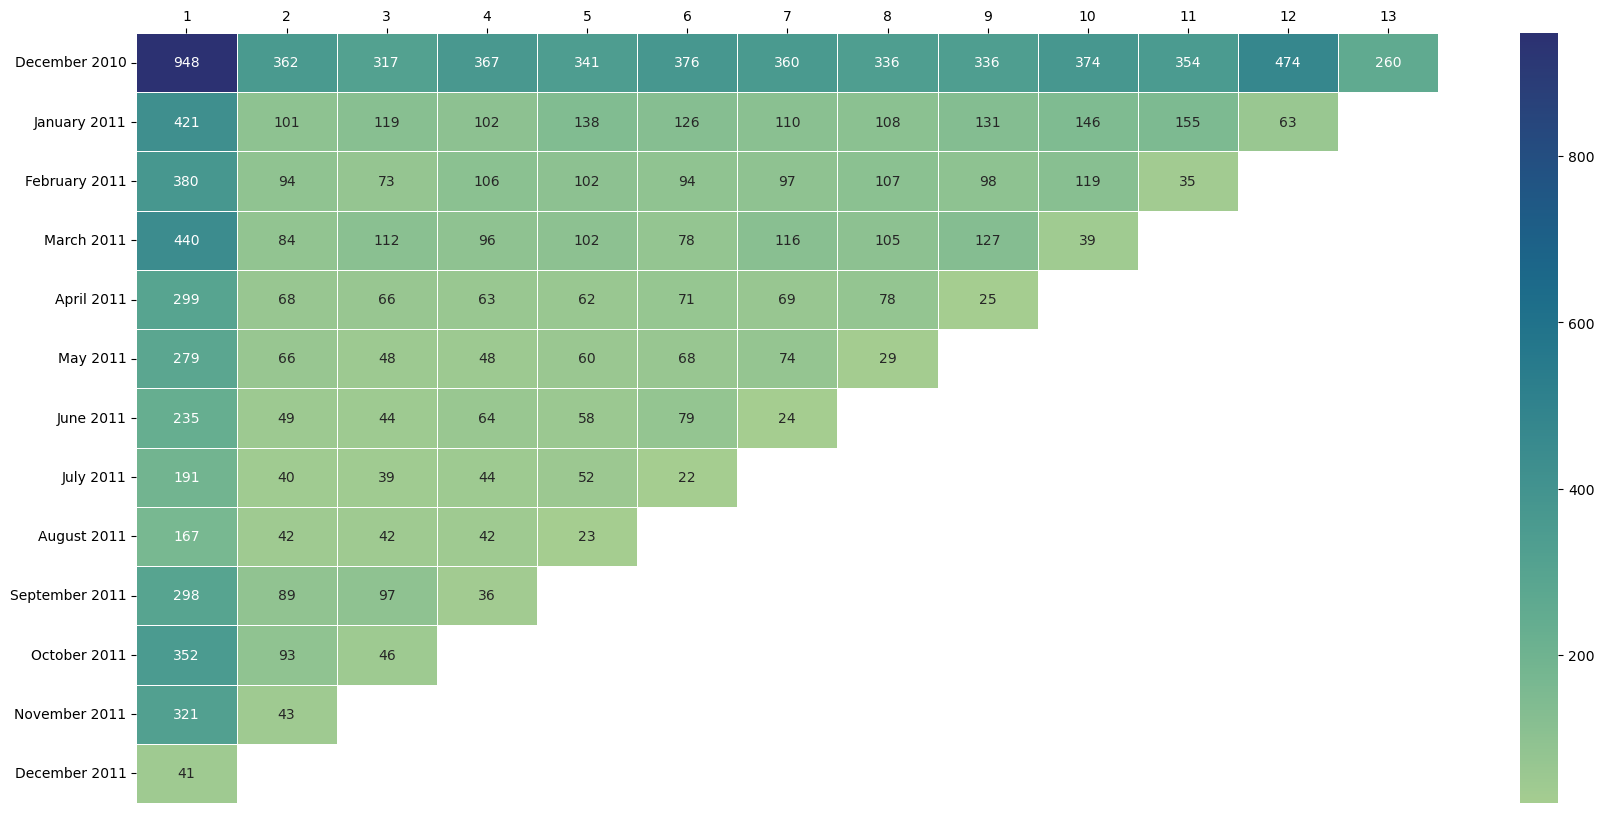

In [15]:
# visualise the cohort table
plt.figure(figsize=(21,10))

ax = sns.heatmap(cohort_table, annot=True, cmap='crest', linewidth=.5, fmt='.0f')
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

In [16]:
# create a new cohort table to retention
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)
new_cohort_table

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort_Month,,,,,,,,,,,,,
December 2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January 2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February 2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March 2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April 2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May 2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June 2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


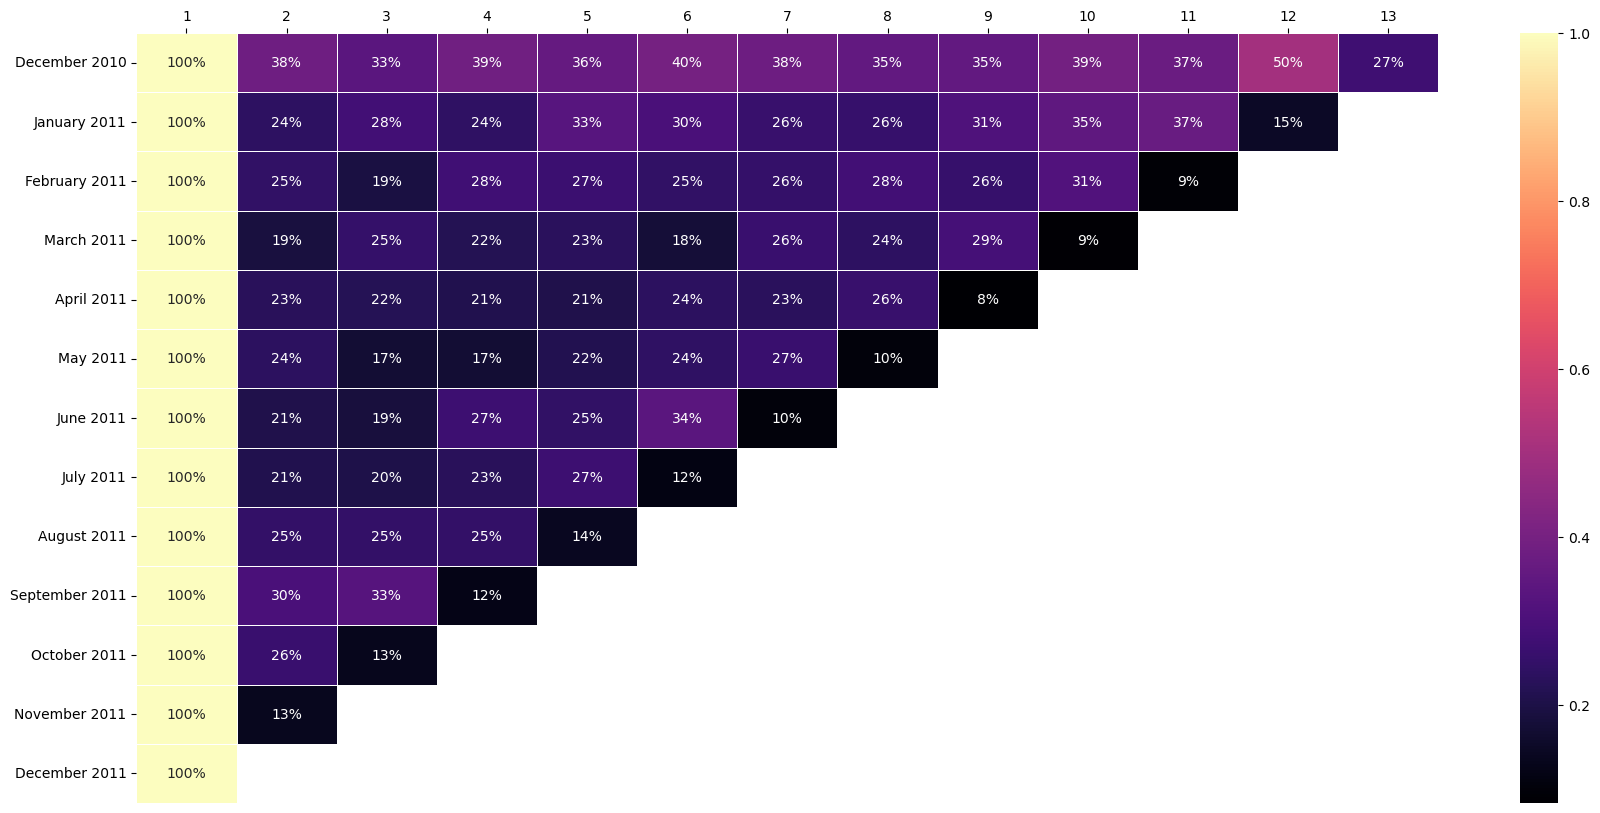

In [17]:
# visualise the cohort table
plt.figure(figsize=(21,10))

ax = sns.heatmap(new_cohort_table, annot=True, cmap='magma', linewidth=.5, fmt='.0%');
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()